In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
covid_flu = pd.read_csv('../data/covid_flu.csv')
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kiểm tra các cột có bao nhiêu phần tử Null

In [3]:
covid_flu.isnull().mean().sort_values()

Diagnosis                      0.000000
Age                            0.018893
Sex                            0.051282
Fever                          0.377193
Coughing                       0.420378
SoreThroat                     0.547908
Temperature                    0.576248
Fatigue                        0.641700
Diarrhea                       0.696356
NauseaVomitting                0.715924
RiskFactors                    0.858974
CTscanResults                  0.892713
lymphocytes                    0.894737
serumLevelsOfWhiteBloodCell    0.898111
CReactiveProteinLevels         0.907557
InitialPCRDiagnosis            0.929825
neutrophil                     0.930499
GroundGlassOpacity             0.937247
DurationOfIllness              0.941296
ShortnessOfBreath              0.949393
dtype: float64

Kiểm tra datatypes

In [4]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

### Feature Improvement

#### Xử lý dữ liệu định lượng

Những cột dữ liệu định lượng có kiểu dữ liệu `float` hoặc `int`

In [5]:
numeric_type = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']
# numerical_columns = covid_flu.select_dtypes(numeric_type).columns.tolist()
numerical_columns = [col for col in covid_flu.columns if covid_flu[col].dtypes in numeric_type]
print(covid_flu[numerical_columns].isnull().mean().sort_values())

Age                            0.018893
Temperature                    0.576248
lymphocytes                    0.894737
serumLevelsOfWhiteBloodCell    0.898111
neutrophil                     0.930499
DurationOfIllness              0.941296
dtype: float64


**Xử lý missing value bằng mean/median**

Chúng ta có thể dùng thư viện SimpleImputer của Scikit learn

In [6]:
from sklearn.impute import SimpleImputer
num_impute = SimpleImputer(strategy='mean')
print(covid_flu['lymphocytes'].mean())
print(num_impute.fit_transform(covid_flu[['lymphocytes']]))

1.8501538461538463
[[1.85015385]
 [1.85015385]
 [1.85015385]
 ...
 [1.85015385]
 [1.85015385]
 [1.85015385]]


**Xử lý missing value bằng giá trị cụ thể**

Chúng ta có thể thay thế các giá trị bị khuyết thiếu bằng các giá trị cụ thể như -1, 0, 99, 999 cho biết rằng giá trị này không bị thiếu một cách ngẫu nhiên. Các giá trị này phải nằm ngoài khoảng giá trị của dữ liệu, ví dụ với nhiệt độ sẽ nằm trong khoảng 0-100 thì việc thay thế bằng 99 sẽ không hợp lý, do đó chúng ta chọn thay thế bằng số 999

In [7]:
arbitrary_imputer = SimpleImputer(strategy='constant', fill_value=999)
arbitrary_imputer.fit_transform(covid_flu[numerical_columns])

array([[ 67.        , 999.        , 999.        , 999.        ,
        999.        ,  38.11111111],
       [ 29.        , 999.        , 999.        , 999.        ,
        999.        , 999.        ],
       [ 22.        , 999.        , 999.        , 999.        ,
        999.        , 999.        ],
       ...,
       [  3.        , 999.        ,  15.        , 999.        ,
        999.        , 999.        ],
       [  4.        , 999.        ,   6.6       , 999.        ,
        999.        , 999.        ],
       [  6.        , 999.        ,   5.3       , 999.        ,
        999.        , 999.        ]])

**Xử lý missing value bằng IQR**

- Nếu biến là phân phối chuẩn, giá trị điền vào nên là mean + 3 * std
- Nếu biến có phân phối bị skewed, chúng ta sử dụng IQR để thêm giá trị cố định bằng cách dùng IQR * 1.5

![img](../images/missing_value_iqr.png)

Để áp dụng phương pháp này, ta dùng `EndTailImputer`  của thư viện feature-engine

Text(0.5, 1.0, 'lymphocytes')

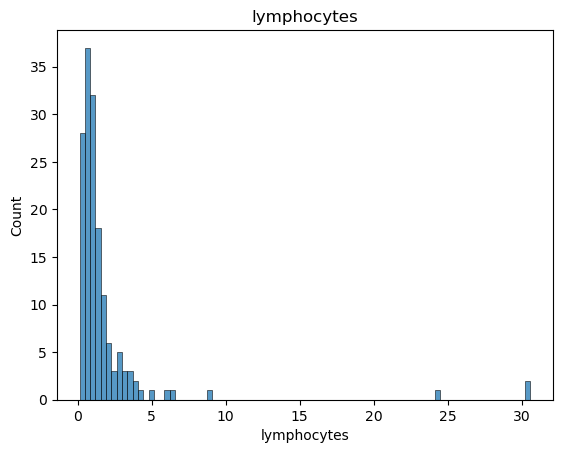

In [18]:
sns.histplot(covid_flu['lymphocytes'])
plt.title("lymphocytes")

In [20]:
from feature_engine.imputation import EndTailImputer

In [28]:
eti = EndTailImputer(imputation_method='gaussian', tail='right', fold=3)
print(covid_flu['lymphocytes'].mean() + 3 * covid_flu['lymphocytes'].std())
eti.fit_transform(covid_flu[['lymphocytes']]).max()

13.72015880654883


lymphocytes    30.6
dtype: float64

<Axes: ylabel='Count'>

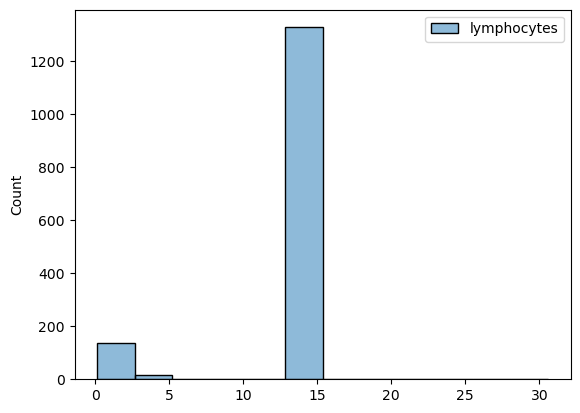

In [27]:
sns.histplot(eti.fit_transform(covid_flu[['lymphocytes']]))

#### Xử lý dữ liệu định tính

In [35]:
categorical_columns = [col for col in covid_flu.columns if covid_flu[col].dtypes=='object']
categorical_columns.remove('Diagnosis')
for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))

InitialPCRDiagnosis
InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: count, dtype: int64
Sex
Sex
M      748
F      658
NaN     76
Name: count, dtype: int64
CReactiveProteinLevels
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: count, Length: 121, dtype: int64
CTscanResults
CTscanResults
NaN    1323
Yes     144
No       15
Name: count, dtype: int64
RiskFactors
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                

Trong các biến categorical, có hai biến `CReactiveProteinLevels` và `RiskFactors` biến có nhiều giá trị khác nhau, còn lại là các biến nhị phân. 

Ta tập trung phân tích biến nhị phân trước, cột `Sex` có giá trị là `M` và `F` trong khi các cột khác có giá trị `Yes`, `No`, do đó ta cũng biến đổi cột Sex sang giá trị này

In [36]:
covid_flu['isFemale'] = covid_flu['Sex'] == 'F'

In [38]:
covid_flu.replace({'Yes': True, 'No': False},inplace=False) 

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,...,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,isFemale
0,H1N1,NaN,67.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,True,NaN,False,NaN,38.111111,False,True
1,H1N1,NaN,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,H1N1,NaN,20.00,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,True,NaN,False,NaN,36.555556,True,True
4,H1N1,NaN,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,COVID19,NaN,1.40,NaN,NaN,9.2,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1478,COVID19,NaN,0.83,NaN,NaN,14.8,NaN,0.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1479,COVID19,NaN,3.00,NaN,NaN,15.0,NaN,0.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1480,COVID19,NaN,4.00,NaN,NaN,6.6,NaN,0.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


**Xử lý liệu missing bằng phần tử xuất hiện nhiều nhất**

In [43]:
cat_impute = SimpleImputer(strategy='most_frequent')
print(covid_flu['Coughing'].value_counts(dropna=True, normalize=True))
print(covid_flu['Coughing'].head())
print(cat_impute.fit_transform(covid_flu[['Coughing']]))

Coughing
Yes    0.867288
No     0.132712
Name: proportion, dtype: float64
0    Yes
1    NaN
2    NaN
3    Yes
4    NaN
Name: Coughing, dtype: object
[['Yes']
 ['Yes']
 ['Yes']
 ...
 ['Yes']
 ['Yes']
 ['Yes']]


**Xử lý dữ liệu missing bằng phần tử cố định**

Chúng ta có thể xem missing value như một nhãn mới và đặt nó là `UNKNOW`

In [45]:
fill_with_unk = SimpleImputer(strategy='constant', fill_value="UNK")
fill_with_unk.fit_transform(covid_flu[['RiskFactors']])

array([['UNK'],
       ['UNK'],
       ['UNK'],
       ...,
       ['UNK'],
       ['UNK'],
       ['UNK']], dtype=object)

### Feature Construction

#### Numerical feature transformattion

**Log transformation**

Chúng ta sử dụng log transformation khi phân phối dữ liệu quá lệch về bên trái, ví dụ như biến `lymphocytes`

In [ ]:
###